In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [99]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2019-01-01'
TEST_START_DATE = '2019-01-01'
TEST_END_DATE = dt.datetime.now().strftime('%Y-%m-%d')

data = yf.download('AAPL', TRAIN_START_DATE, TEST_END_DATE)

[*********************100%%**********************]  1 of 1 completed


In [100]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740172,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855819,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748023,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800


In [107]:
data['target'] = data['Close'].shift(1)
data.fillna(0, inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740172,746015200,0.000000
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855819,1181608400,3.241071
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,3.377857
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748023,753048800,3.322143
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,3.250357


In [108]:
model = keras.Sequential([
	tf.keras.layers.Normalization(axis=-1),
	layers.Dense(64, activation='relu'),
	layers.Dense(64, activation='relu'),
	layers.Dense(1)
])

model.compile(loss='mean_squared_error',
			optimizer=tf.keras.optimizers.legacy.Adam(0.001))

In [109]:
target_name = 'target'
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[target_name], axis=1), data[target_name], 
                                                    shuffle=False, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [110]:
X_train.shape, X_test.shape

((3126, 6), (782, 6))

In [111]:
X_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740172,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855819,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748023,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800


In [112]:
y_train.head()

Date
2009-01-02    0.000000
2009-01-05    3.241071
2009-01-06    3.377857
2009-01-07    3.322143
2009-01-08    3.250357
Name: target, dtype: float64

In [113]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    shuffle=False,
    verbose=0, epochs=100)

In [114]:
test_results = {}

In [115]:
test_results['dnn_model'] = model.evaluate(X_test, y_test, verbose=0)

In [116]:
test_results

{'dnn_model': 2052.952880859375}

In [117]:
test_predictions = model.predict(X_test)



25/25 [==============================] - 0s 471us/step


In [124]:
X_test['predict'] = test_predictions

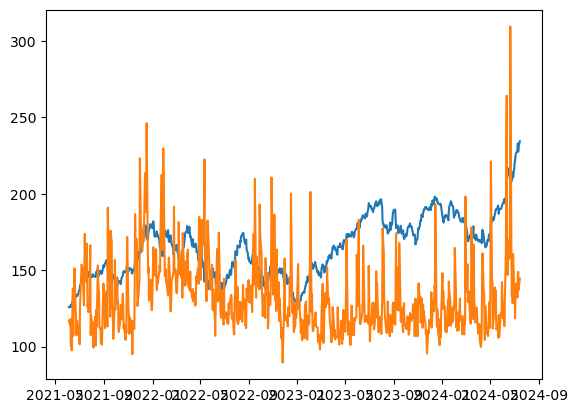

In [125]:
plt.plot(X_test['Close'])
plt.plot(X_test['predict']);